# <center>CHIRAC ou MITTERAND ? </center>

In [2]:
#Bibliothèques utiles
import numpy as np
import matplotlib.pyplot as plt
import codecs
import re #pour les regex
import os.path 
import string
from unidecode import unidecode #pour supprimer les accents
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer #pour le bag of words
import nltk #pour racinisation, mots blancs et lemmatisation
from wordcloud import WordCloud #pour visualisation
import spacy #pour racinisation et lemmatisation


## Chargement des données

In [3]:
# Chargement des données:
def load_pres(fname):
    alltxts = []
    alllabs = []
    s=codecs.open(fname, 'r','utf-8') # pour régler le codage
    while True:
        txt = s.readline()
        if(len(txt))<5:
            break
        #
        lab = re.sub(r"<[0-9]*:[0-9]*:(.)>.*","\\1",txt) #recupère le label (C ou M)
        txt = re.sub(r"<[0-9]*:[0-9]*:.>(.*)","\\1",txt) #recupère le texte
        if lab.count('M') >0:
            alllabs.append(-1)
        else:
            alllabs.append(1) #si c'est Mitterand qui parle on met -1 si c'est Chirac, on met 1
        alltxts.append(txt)
    return alltxts,alllabs

fname = "./corpus.tache1.learn.utf8"
alltxts,alllabs = load_pres(fname)

## Nettoyage des données

### 1) Pré-processing

In [4]:
#fonction de pré-traitement personnalisé
# -> suppression des chiffres
# -> suppression de la ponctuation
# -> suppression des accents
# -> mise en minuscule

def preprocessPerso(text): 
    #suppression de la ponctuation
    punc = string.punctuation
    punc += '\n\r\t'
    text = text.translate(str.maketrans(punc, ' '*len(punc)))
    #suppression des chiffres
    text = re.sub(r"[0-9]","",text)
    #suppression des accents
    text = unidecode(text)
    #mise en minuscule
    return text.lower()

### 2) Suppression des mots non discriminants

In [5]:
# Mots blancs + mots les plus fréquents

nltk.download('stopwords')
from nltk.corpus import stopwords
final_stopwords_list = stopwords.words('french')
#mots les plus fréquents donc non-discriminants
final_stopwords_list += ['ai','au','aujourd','aussi','autres','aux','avec','avez' ,'avons',
 'bien', 'ce' ,'cela', 'ces', 'cette' ,'ceux', 'chacun' ,'comme', 'dans' ,'date'
 'de', 'depuis', 'des' ,'deux' ,'dire' ,'doit' ,'dont' ,'du'
 'elle' ,'en' ,'encore', 'ensemble', 'entre', 'est' ,'et', 'etat', 'ete' ,'etre',
 'europe' ,'faire' ,'fait' ,'faut', 'francais' ,'france', 'hui' ,'ici', 'il' ,'ils',
 'je' ,'la', 'le' ,'les', 'leur' ,'leurs', 'mais', 'meme' ,'monde', 'monsieur' ,'ne',
 'nom', 'nos', 'notre', 'nous', 'on', 'ont' ,'ou', 'paix', 'par', 'pas', 'pays',
 'peut' ,'plus' ,'politique' ,'pour', 'president' ,'qu', 'que' ,'qui', 'sa', 'sans',
 'se' ,'ses' ,'si' ,'son' ,'sont', 'sur', 'temps', 'tous', 'tout', 'toute' ,'toutes',
 'tres', 'un' ,'une' ,'union', 'vie', 'vos' ,'votre', 'vous']

print(len(final_stopwords_list))
print(final_stopwords_list)

253
['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'ils', 'je', 'la', 'le', 'les', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés', 'étant', 'étante', 'étants', 'étantes', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'étais', 'était', 'étions', 'étiez', 'étaient', 'fus', 'fut', 'fûmes', 'fûtes', 'furent', 'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fût', 'fussions', 'fussiez', 'fussent', 'ayant', 'ayante', 'ayantes', 'ayants', 'eu', 'eue', 'eues', 'eus', 'ai', 'as', 'avons', 'avez', 'ont', 'aurai', 'auras', 'aura', 'aurons', 

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/nilsbarrellon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 1er bag of words


Taille du BOW 1= (57413, 26894)
Taille du vocabulaire =  26894
['abritent' 'abriter' 'abritez' 'abrogation' 'abroge' 'abscons' 'absence'
 'absent' 'absente' 'absenteisme' 'absenter' 'absentes' 'absents' 'absolu'
 'absolua' 'absolue' 'absolument' 'absolus' 'absolutisme' 'absorbe'
 'absorber' 'absorbera' 'absorbes' 'absorption' 'abstenir' 'abstention'
 'abstentionnisme' 'abstenue' 'abstraction' 'abstraire' 'abstrait'
 'abstraite' 'abstraits' 'absurde' 'absurdement' 'absurdes' 'absurdite'
 'absurdites' 'abuja' 'abus' 'abusait' 'abuse' 'abuser' 'abuses' 'abusive'
 'abusivement' 'abusives' 'abymes' 'academicien' 'academiciens' 'academie'
 'academies' 'academique' 'acadie' 'acadien' 'acadienne' 'acadiennes'
 'acadiens' 'acapulco' 'accable' 'accablent' 'accables' 'accaparement'
 'accaparer' 'accedant' 'accedants' 'accede' 'accedent' 'acceder'
 'accedera' 'accederent' 'accelerateur' 'accelerateurs' 'acceleration'
 'accelerations' 'accelere' 'acceleree' 'accelerees' 'accelerent'
 'accelerer' 'a

(-0.5, 1499.5, 999.5, -0.5)

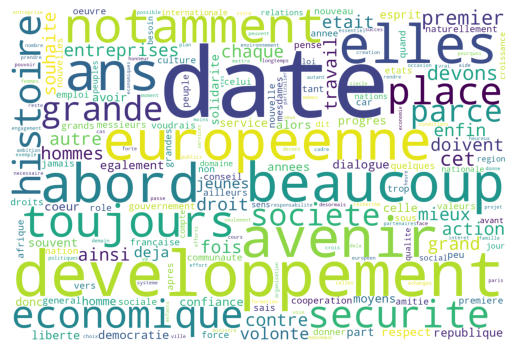

In [9]:
vectorizer = CountVectorizer(stop_words=final_stopwords_list,analyzer="word", preprocessor=preprocessPerso)
BOW1 = vectorizer.fit_transform(alltxts)
print("Taille du BOW 1=",BOW1.shape)
word_counts = BOW1.sum(axis=0).A1
word_freq = dict(zip(vectorizer.get_feature_names_out(), word_counts))
print("Taille du vocabulaire = ",len(word_freq))
print(vocabulaire[100:200])
#word_freq : dictionnaire des mots et de leur fréquence DANS TOUS LES DOCUMENTS

wordcloud = WordCloud(background_color='white', max_words=200,width=1500,height=1000).generate_from_frequencies(word_freq)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")

## 2eme bag of words => utilisation de TF_IDF

In [25]:
use_idf=True
smooth_idf=True
sublinear_tf=False

vectorizer = TfidfVectorizer(use_idf= use_idf, smooth_idf=smooth_idf, sublinear_tf=sublinear_tf,\
                            stop_words=final_stopwords_list,max_features=2000)
BOW2 = vectorizer.fit_transform(alltxts)
print(BOW2[0])
vocabulaire = vectorizer.get_feature_names_out()

print("Taille de BOW 2=",BOW2.shape)
print("Nb de mots du vocabulaire:",len(vocabulaire))
print("--------------- Vocabulaire -------------------")
print(vocabulaire[100:200])

  (0, 1467)	0.3438397119996804
  (0, 507)	0.4107044479539745
  (0, 280)	0.410082925157773
  (0, 93)	0.3842138932658019
  (0, 62)	0.36590653402789425
  (0, 1003)	0.30780196942984567
  (0, 677)	0.4107044479539745
Taille de BOW 2= (57413, 2000)
Nb de mots du vocabulaire: 2000
--------------- Vocabulaire -------------------
['américain' 'américains' 'amérique' 'an' 'ancien' 'ancienne' 'anciennes'
 'anciens' 'anniversaire' 'année' 'années' 'ans' 'appartenance'
 'appartient' 'appel' 'appeler' 'appelle' 'appelé' 'application'
 'appliquer' 'apporte' 'apporter' 'apporté' 'apprendre' 'apprentissage'
 'approche' 'approfondir' 'appui' 'appuyer' 'après' 'arabe' 'architecture'
 'argent' 'argentine' 'armes' 'armée' 'armées' 'arrive' 'art' 'artisans'
 'artistes' 'arts' 'asie' 'aspiration' 'aspirations' 'assemblée' 'assez'
 'assistance' 'associatif' 'association' 'associations' 'associer'
 'assumer' 'assurance' 'assurer' 'assuré' 'assurée' 'atlantique' 'atout'
 'atouts' 'attache' 'attachement' 'attaché

Taille du vocabulaire =  2000


(-0.5, 1499.5, 999.5, -0.5)

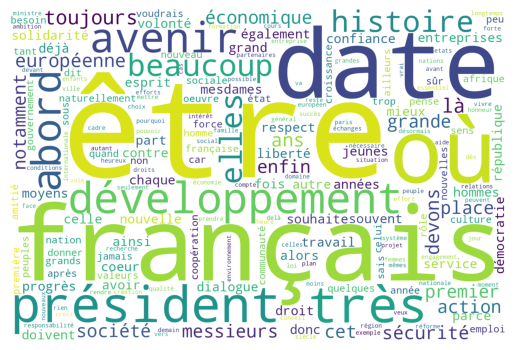

In [13]:
word_counts = BOW2.sum(axis=0).A1
word_freq = dict(zip(vectorizer.get_feature_names_out(), word_counts))
print("Taille du vocabulaire = ",len(word_freq))

#word_freq : dictionnaire des mots et de leur fréquence DANS TOUS LES DOCUMENTS

wordcloud = WordCloud(background_color='white', max_words=200,width=1500,height=1000).generate_from_frequencies(word_freq)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")

## 3ème bag of words : N-GRAMMES

In [15]:
ngram_range = (1,2) # unigrams and bigrams
vectorizer = CountVectorizer(ngram_range=ngram_range,analyzer='word',stop_words=final_stopwords_list,preprocessor=preprocessPerso) # Maybe 2-grams or 3-grams bring improvements ?
BOW3 = vectorizer.fit_transform(alltxts)
vocabulaire = vectorizer.get_feature_names_out()
print("Taille de BOW 3=",BOW3.shape)
print("Nb de mots du vocabulaire:",len(vocabulaire))
print("--------------- Vocabulaire -------------------")
print(vocabulaire[100:200])

Taille de BOW 3= (57413, 387669)
Nb de mots du vocabulaire: 387669
--------------- Vocabulaire -------------------
['abandonner rien' 'abandonner role' 'abandonner sienne' 'abandonner sort'
 'abandonner trois' 'abandonnerai' 'abandonnerai donc' 'abandonnes'
 'abandonnes connaissent' 'abandonnes difficultes' 'abandonnes memes'
 'abandonnes occasions' 'abandonnes parce' 'abandonnes pouvoirs'
 'abandonnes sort' 'abandonnes tete' 'abandonnes vaincus' 'abandonnons'
 'abandonnons sort' 'abandonnons valeurs' 'abat' 'abat priorite'
 'abat republique' 'abattage' 'abattage nombreux' 'abattage produits'
 'abattage va' 'abattait' 'abattait grande' 'abattait mur'
 'abattait partie' 'abattait tragiquement' 'abatte' 'abatte nouveau'
 'abattent' 'abattent force' 'abattre' 'abattre barrieres'
 'abattre coalitions' 'abattu' 'abattu extremisme' 'abattu infamie'
 'abattues' 'abattues attentats' 'abattues personnes' 'abattues portes'
 'abbaye' 'abbaye dames' 'abbaye hommes' 'abbayes' 'abbayes lycee' 'abbes

Taille du vocabulaire =  387669


(-0.5, 1499.5, 999.5, -0.5)

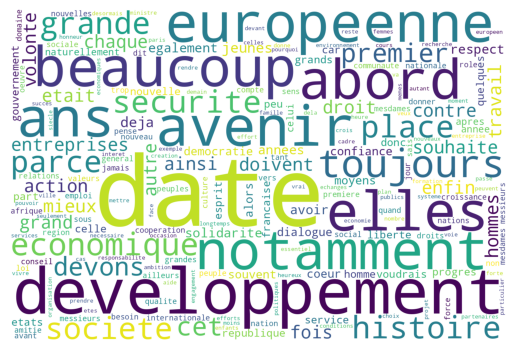

In [16]:
word_counts = BOW3.sum(axis=0).A1
word_freq = dict(zip(vectorizer.get_feature_names_out(), word_counts))
print("Taille du vocabulaire = ",len(word_freq))

#word_freq : dictionnaire des mots et de leur fréquence DANS TOUS LES DOCUMENTS

wordcloud = WordCloud(background_color='white', max_words=200,width=1500,height=1000).generate_from_frequencies(word_freq)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")

## 4eme Bag of words : après RACINISATION

In [9]:
nlp = spacy.load("fr_core_news_sm", disable=["parser", "ner"])  # Désactive les composants inutiles pour accélérer

def lemmatisation(text, stopwords):
    text = preprocessPerso(text)
    doc = nlp(text.lower())
    # Lemmatiser uniquement les mots qui ne sont pas des stopwords
    lemmatized = [token.lemma_ for token in doc if token.text not in stopwords]
    text = " ".join(lemmatized).strip()
    #on supprime les espaces surnuméraires
    text = re.sub(r'\s+', ' ', text)
    return text

# Pré-traiter tous les textes
compteur = 0
alltxts_lemmatise = []
n = len(alltxts)
for text in alltxts:
    if compteur%100==0:
        print("Traitement ",compteur,"/",n)
    alltxts_lemmatise.append(lemmatisation(text, final_stopwords_list))
    compteur+=1


Traitement  0 / 57413
Traitement  100 / 57413


KeyboardInterrupt: 

In [68]:
print(alltxts[2])
print("-------------------------------")
print(alltxts_lemmatise[2])

 C'est toujours très émouvant de venir en Afrique car c'est probablement l'une des rares terres du monde où l'on ait conservé cette convivialité, cette amitié, ce respect de l'autre qui s'expriment avec chaleur, avec spontanéité et qui réchauffent le coeur de ceux qui arrivent et de ceux qui reçoivent.

-------------------------------
être toujours tre emouver venir afrique car être probablement rare terre avoir conserve convivialite amitie respect autre exprimer chaleur spontaneite rechauffer coeur celui arriver celui recoiver


In [71]:
#on sauvegarde dans un fichier les phrases lemmatisées et nettoyées car le processus est long !
#les labels sont toujours corrects dans alllabs
with open("corpus_nettoye_lemmatise.txt","w",encoding="utf-8") as f:
    for i in range(len(alltxts_lemmatise)):
        f.write(alltxts_lemmatise[i])
        f.write("\n")

In [17]:
#ouverture du fichier
alltxts_lemm = []
with open("corpus_nettoye_lemmatise.txt","r",encoding="utf-8") as f:
    for ligne in f:
        alltxts_lemm.append(ligne.strip())

Taille du BOW 4= (57413, 19049)
Taille du vocabulaire =  19049


(-0.5, 1499.5, 999.5, -0.5)

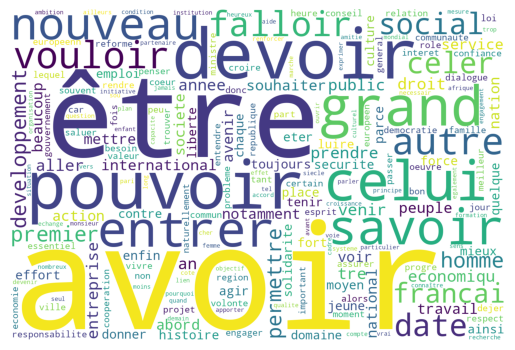

In [18]:
vectorizer = CountVectorizer()
BOW4 = vectorizer.fit_transform(alltxts_lemm)
print("Taille du BOW 4=",BOW4.shape)
word_counts = BOW4.sum(axis=0).A1
word_freq = dict(zip(vectorizer.get_feature_names_out(), word_counts))
print("Taille du vocabulaire = ",len(word_freq))

#word_freq : dictionnaire des mots et de leur fréquence DANS TOUS LES DOCUMENTS

wordcloud = WordCloud(background_color='white', max_words=200,width=1500,height=1000).generate_from_frequencies(word_freq)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")


### 5eme bag of words : bigrammes avec racinisation

In [19]:
ngram_range = (1,2) # unigrams and bigrams
vectorizer = CountVectorizer(ngram_range=ngram_range,analyzer='word',stop_words=final_stopwords_list,preprocessor=preprocessPerso) # Maybe 2-grams or 3-grams bring improvements ?
BOW5 = vectorizer.fit_transform(alltxts_lemm)
print("Taille du BOW 5=",BOW5.shape)
word_counts = BOW5.sum(axis=0).A1
word_freq = dict(zip(vectorizer.get_feature_names_out(), word_counts))
print("Taille du vocabulaire = ",len(word_freq))


Taille du BOW 5= (57413, 328573)
Taille du vocabulaire =  328573


Taille du vocabulaire =  328573


(-0.5, 1499.5, 999.5, -0.5)

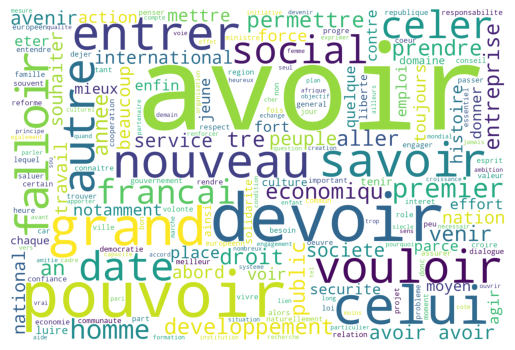

In [20]:
word_counts = BOW5.sum(axis=0).A1
word_freq = dict(zip(vectorizer.get_feature_names_out(), word_counts))
print("Taille du vocabulaire = ",len(word_freq))

#word_freq : dictionnaire des mots et de leur fréquence DANS TOUS LES DOCUMENTS

wordcloud = WordCloud(background_color='white', max_words=200,width=1500,height=1000).generate_from_frequencies(word_freq)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")


### 6eme bag of word : binary

In [23]:
min_df=5
max_df=0.5
max_features=10000
vectorizer = CountVectorizer(max_df=max_df,min_df=min_df,max_features=max_features,binary=True,stop_words=final_stopwords_list) #try out some values
BOW6 = vectorizer.fit_transform(alltxts)

Taille du vocabulaire =  10000


(-0.5, 1499.5, 999.5, -0.5)

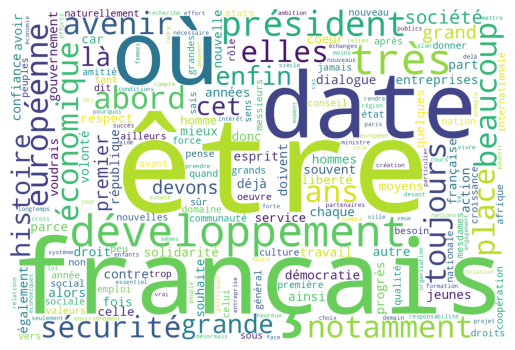

In [24]:
word_counts = BOW6.sum(axis=0).A1
word_freq = dict(zip(vectorizer.get_feature_names_out(), word_counts))
print("Taille du vocabulaire = ",len(word_freq))

#word_freq : dictionnaire des mots et de leur fréquence DANS TOUS LES DOCUMENTS

wordcloud = WordCloud(background_color='white', max_words=200,width=1500,height=1000).generate_from_frequencies(word_freq)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")

## 7ème bog : TF-IDF et racinisation

  (0, 3056)	0.2998945594821483
  (0, 588)	0.30380101386951186
  (0, 187)	0.30664223411112185
  (0, 122)	0.27033678000185324
  (0, 1695)	0.42025539570133885
  (0, 1154)	0.42867254041993685
  (0, 1571)	0.35504019573337087
  (0, 3334)	0.4052511291654506
Taille de BOW 7= (57413, 4000)
Nb de mots du vocabulaire: 4000
--------------- Vocabulaire -------------------
['affectee' 'affecter' 'affectif' 'affection' 'affectueux' 'affinite'
 'affirmation' 'affirmer' 'affrontement' 'affrontemer' 'affronter'
 'afghanistan' 'afin' 'africain' 'afrique' 'ag' 'age' 'agee' 'agence'
 'agent' 'agglomeration' 'aggraver' 'agir' 'agreabl' 'agression'
 'agricole' 'agriculteur' 'agriculture' 'agro' 'aide' 'aider' 'ailleurs'
 'aimer' 'aimf' 'aine' 'ainsi' 'air' 'airbus' 'aise' 'aisement' 'ajoutee'
 'ajouter' 'ajustement' 'alea' 'alerte' 'algerie' 'algerien' 'aliment'
 'alimentaire' 'alimentation' 'alimenter' 'all' 'allegement' 'alleger'
 'allemagn' 'allemagne' 'allemand' 'aller' 'alliance' 'allie' 'alliee'
 'alli

(-0.5, 1499.5, 999.5, -0.5)

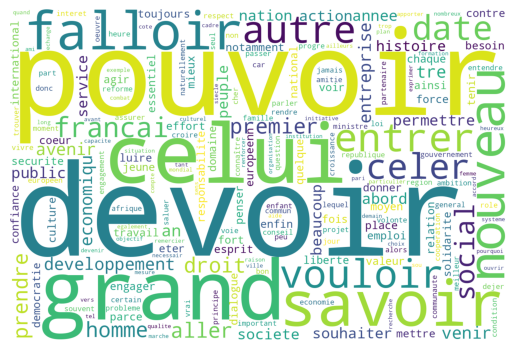

In [32]:
use_idf=True
smooth_idf=True
sublinear_tf=False
final_stopwords_list += ["avoir","être"]
vectorizer = TfidfVectorizer(use_idf= use_idf, smooth_idf=smooth_idf, sublinear_tf=sublinear_tf,\
                            stop_words=final_stopwords_list,max_features=4000)
BOW7 = vectorizer.fit_transform(alltxts_lemm)
print(BOW7[0])
vocabulaire = vectorizer.get_feature_names_out()

print("Taille de BOW 7=",BOW7.shape)
print("Nb de mots du vocabulaire:",len(vocabulaire))
print("--------------- Vocabulaire -------------------")
print(vocabulaire[100:200])

word_counts = BOW7.sum(axis=0).A1
word_freq = dict(zip(vectorizer.get_feature_names_out(), word_counts))
print("Taille du vocabulaire = ",len(word_freq))

#word_freq : dictionnaire des mots et de leur fréquence DANS TOUS LES DOCUMENTS

wordcloud = WordCloud(background_color='white', max_words=200,width=1500,height=1000).generate_from_frequencies(word_freq)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")

## 8ème bog Racinisation + bigrammes + TF-IDF

In [54]:
ngram_range = (1,2) # unigrams and bigrams

use_idf=True
smooth_idf=True
sublinear_tf=False

vectorizer = TfidfVectorizer(ngram_range=ngram_range,analyzer="word",use_idf= use_idf, smooth_idf=smooth_idf, sublinear_tf=sublinear_tf,\
                            stop_words=final_stopwords_list)
BOW8 = vectorizer.fit_transform(alltxts_lemm)

In [55]:
print(BOW8[0])
vocabulaire = vectorizer.get_feature_names_out()

print("Taille de BOW 8=",BOW8.shape)
print("Nb de mots du vocabulaire:",len(vocabulaire))
print("--------------- Vocabulaire -------------------")
print(len(vocabulaire))
print(vocabulaire[:50])

  (0, 266471)	0.16914314636571914
  (0, 51700)	0.17134642070105155
  (0, 16922)	0.17294889369027058
  (0, 9591)	0.1524723010208945
  (0, 149085)	0.23702770743437285
  (0, 99656)	0.24177505044578884
  (0, 137605)	0.2002457660330375
  (0, 287695)	0.22856517028407458
  (0, 266532)	0.34096840029214487
  (0, 51712)	0.20459946320426217
  (0, 16928)	0.34096840029214487
  (0, 9871)	0.3286956917009861
  (0, 149097)	0.3077153577889343
  (0, 99674)	0.319988066380093
  (0, 137728)	0.319988066380093
Taille de BOW 8= (57413, 345787)
Nb de mots du vocabulaire: 345787
--------------- Vocabulaire -------------------
345787
['aaron' 'aaron assurer' 'ab' 'ab date' 'abaisse' 'abaisse meconnu'
 'abaissement' 'abaissement cout' 'abaissemer' 'abaissemer cout'
 'abaissemer servitude' 'abaissemer taux' 'abaisser' 'abaisser bras'
 'abaisser charge' 'abaisser cout' 'abaisser echange' 'abaisser impot'
 'abaisser niveau' 'abaisser poids' 'abaisser preserver' 'abaisser prix'
 'abandon' 'abandon abaissemer' 'abandon

## Choix du modèle avec TF-IDF

In [45]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np


corpus1 = [alltxts[i] for i in range(len(alltxts)) if alllabs[i]==1] #Chirac
corpus2 = [alltxts[i] for i in range(len(alltxts)) if alllabs[i]==-1] #Mitterand

# Nettoyage et vectorisation
vectorizer = CountVectorizer(token_pattern=r'\b[a-zA-Zàâäéèêëîïôöùûüçœ]{2,}\b')
X = vectorizer.fit_transform(corpus1 + corpus2)
vocabulaire = vectorizer.get_feature_names_out()

# Fréquences par corpus
X1 = X[:len(corpus1)].sum(axis=0).A1
X2 = X[len(corpus1):].sum(axis=0).A1

# Calcul de l'odds ratio
freq1 = pd.Series(X1, index=vocabulaire) #fréquence d'apparition de chaque mot pour Chirac
freq2 = pd.Series(X2, index=vocabulaire)#fréquence d'apparition de chaque mot pour Mitterand

# Éviter les divisions par zéro
freq1 = freq1 + 1
freq2 = freq2 + 1

odds_ratio = (freq1 / (freq1.sum() - freq1)) / (freq2 / (freq2.sum() - freq2))

# Trier par odds ratio (descendant)
top_100 = odds_ratio.sort_values(ascending=False).head(100)

print(top_100)

odds_ratio2 = (freq2 / (freq2.sum() - freq2)) / (freq1 / (freq1.sum() - freq1))
top_100_2 = odds_ratio2.sort_values(ascending=False).head(100)

print(top_100_2)

mondialisation    76.560328
euro              65.929850
partenariat       38.605431
attentes          37.948305
constituent       22.333734
                    ...    
compatriotes       8.217135
chaleureux         8.167359
moteur             8.022537
ueo                8.022286
ardeur             8.022286
Length: 100, dtype: float64
convenait    92.254063
nièvre       64.576117
eurêka       55.350463
estampes     50.737699
cee          50.737699
               ...    
niort        18.449496
cahors       18.449496
aurillac     18.449496
berry        18.449496
rêvaient     18.449496
Length: 100, dtype: float64


## Classifiers

In [36]:
from sklearn.metrics import recall_score, f1_score

rs=10

def classifier(bow):
    [X_train, X_test, y_train, y_test]  = train_test_split(bow, alllabs, test_size=0.2, random_state=rs, shuffle=True)
    #Naïve Bayes
    t1 = perf_counter()
    nb_clf = MultinomialNB()
    nb_clf.fit(X_train, y_train)
    t2 = perf_counter()
    #Logistic Regression
    t = 1e-8
    C=100.0
    lr_clf = LogisticRegression(random_state=0, solver='liblinear',max_iter=100, tol=t, C=C)
    lr_clf.fit(X_train, y_train)
    t3 = perf_counter()
    #Linear SVM
    svm_clf = LinearSVC(random_state=0)
    svm_clf.fit(X_train, y_train)
    t4 = perf_counter()
    #affichage des précisions
    pred_nbt = nb_clf.predict(X_train)
    pred_lrt = lr_clf.predict(X_train)
    pred_svmt = svm_clf.predict(X_train)
    
    pred_nb = nb_clf.predict(X_test)
    pred_lr = lr_clf.predict(X_test)
    pred_svm = svm_clf.predict(X_test)

    
    
    # Métriques pour Naïve Bayes
    print("Naive Bayes ", t2 - t1)
    print(f"Naïve Bayes accuracy train={accuracy_score(y_train, pred_nbt):.4f}, test={accuracy_score(y_test, pred_nb):.4f}")
    print(f"Naïve Bayes recall train={recall_score(y_train, pred_nbt, average='macro'):.4f}, test={recall_score(y_test, pred_nb, average='macro'):.4f}")
    print(f"Naïve Bayes F1-score train={f1_score(y_train, pred_nbt, average='macro'):.4f}, test={f1_score(y_test, pred_nb, average='macro'):.4f}")
    print("--------------------------------------------------------------")

    # Métriques pour Régression Logistique
    print("Logistic Regression ", t3 - t2)
    print(f"Logistic Regression accuracy train={accuracy_score(y_train, pred_lrt):.4f}, test={accuracy_score(y_test, pred_lr):.4f}")
    print(f"Logistic Regression recall train={recall_score(y_train, pred_lrt, average='macro'):.4f}, test={recall_score(y_test, pred_lr, average='macro'):.4f}")
    print(f"Logistic Regression F1-score train={f1_score(y_train, pred_lrt, average='macro'):.4f}, test={f1_score(y_test, pred_lr, average='macro'):.4f}")
    print("--------------------------------------------------------------")

    # Métriques pour SVM
    print("SVM ", t4 - t3)
    print(f"SVM accuracy train={accuracy_score(y_train, pred_svmt):.4f}, test={accuracy_score(y_test, pred_svm):.4f}")
    print(f"SVM recall train={recall_score(y_train, pred_svmt, average='macro'):.4f}, test={recall_score(y_test, pred_svm, average='macro'):.4f}")
    print(f"SVM F1-score train={f1_score(y_train, pred_svmt, average='macro'):.4f}, test={f1_score(y_test, pred_svm, average='macro'):.4f}")



In [56]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from time import perf_counter
bows = [BOW1,BOW2,BOW3,BOW4,BOW5,BOW6,BOW7,BOW8]
for i in range(len(bows)):
    print("\n------------------ Bag of Word n°",i+1,"------------------------")
    classifier(bows[i])


------------------ Bag of Word n° 1 ------------------------
Naive Bayes  0.010717744000430685
Naïve Bayes accuracy train=0.9204, test=0.8816
Naïve Bayes recall train=0.7618, test=0.6781
Naïve Bayes F1-score train=0.7992, test=0.7021
--------------------------------------------------------------
Logistic Regression  3.5583574819993373
Logistic Regression accuracy train=0.9859, test=0.8641
Logistic Regression recall train=0.9549, test=0.6813
Logistic Regression F1-score train=0.9681, test=0.6887
--------------------------------------------------------------
SVM  0.8194953390011506
SVM accuracy train=0.9745, test=0.8830
SVM recall train=0.9113, test=0.6894
SVM F1-score train=0.9401, test=0.7114

------------------ Bag of Word n° 2 ------------------------
Naive Bayes  0.006928159000381129
Naïve Bayes accuracy train=0.8743, test=0.8742
Naïve Bayes recall train=0.5241, test=0.5210
Naïve Bayes F1-score train=0.5130, test=0.5070
--------------------------------------------------------------

Les précisions sur les données de testsont inférieures à celles sur les données d'entraînement. Ce qui indique un sur-apprentissage.

In [52]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, f1_score

#CES FONCTIONS DE TRACE DE GRAPHIQUE A ETE REALISEES PAR MISTRAL AI

def plot_metrics(X_train, X_test, y_train, y_test, models, model_names, rs=42):
    # Dictionnaire pour stocker les métriques
    metrics = {
        'Model': [],
        'Dataset': [],
        'Accuracy': [],
        'Recall': [],
        'F1-score': []
    }

    # Calcul des métriques pour chaque modèle
    for clf, name in zip(models, model_names):
        clf.fit(X_train, y_train)

        # Prédictions
        pred_train = clf.predict(X_train)
        pred_test = clf.predict(X_test)

        # Métriques sur l'entraînement
        metrics['Model'].append(name)
        metrics['Dataset'].append('Train')
        metrics['Accuracy'].append(accuracy_score(y_train, pred_train))
        metrics['Recall'].append(recall_score(y_train, pred_train, average='macro'))
        metrics['F1-score'].append(f1_score(y_train, pred_train, average='macro'))

        # Métriques sur le test
        metrics['Model'].append(name)
        metrics['Dataset'].append('Test')
        metrics['Accuracy'].append(accuracy_score(y_test, pred_test))
        metrics['Recall'].append(recall_score(y_test, pred_test, average='macro'))
        metrics['F1-score'].append(f1_score(y_test, pred_test, average='macro'))

    # Création d'un DataFrame pour faciliter la manipulation
    df_metrics = pd.DataFrame(metrics)

    # Tracé des graphiques
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Graphique pour l'Accuracy
    for dataset in ['Train', 'Test']:
        subset = df_metrics[df_metrics['Dataset'] == dataset]
        axes[0].bar(np.arange(len(model_names)) + 0.2 * (0 if dataset == 'Train' else 1),
                    subset['Accuracy'], width=0.2, label=f'{dataset} Accuracy')
    axes[0].set_title('Accuracy par modèle')
    axes[0].set_xticks(np.arange(len(model_names)) + 0.1)
    axes[0].set_xticklabels(model_names)
    axes[0].legend()

    # Graphique pour le Rappel
    for dataset in ['Train', 'Test']:
        subset = df_metrics[df_metrics['Dataset'] == dataset]
        axes[1].bar(np.arange(len(model_names)) + 0.2 * (0 if dataset == 'Train' else 1),
                    subset['Recall'], width=0.2, label=f'{dataset} Recall')
    axes[1].set_title('Rappel par modèle')
    axes[1].set_xticks(np.arange(len(model_names)) + 0.1)
    axes[1].set_xticklabels(model_names)
    axes[1].legend()

    # Graphique pour le F1-score
    for dataset in ['Train', 'Test']:
        subset = df_metrics[df_metrics['Dataset'] == dataset]
        axes[2].bar(np.arange(len(model_names)) + 0.2 * (0 if dataset == 'Train' else 1),
                    subset['F1-score'], width=0.2, label=f'{dataset} F1-score')
    axes[2].set_title('F1-score par modèle')
    axes[2].set_xticks(np.arange(len(model_names)) + 0.1)
    axes[2].set_xticklabels(model_names)
    axes[2].legend()

    plt.tight_layout()
    plt.savefig('model_metrics_comparison.png', format='png', dpi=200, bbox_inches='tight')
    plt.show()

# Exemple d'utilisation dans ta fonction classifier
def classifier2(bow, alllabs, rs=42):
    [X_train, X_test, y_train, y_test] = train_test_split(bow, alllabs, test_size=0.2, random_state=rs, shuffle=True)

    # Initialisation des modèles
    nb_clf = MultinomialNB()
    lr_clf = LogisticRegression(random_state=0, solver='liblinear', max_iter=100, tol=1e-8, C=100.0)
    svm_clf = LinearSVC(random_state=0)

    models = [nb_clf, lr_clf, svm_clf]
    model_names = ['Naïve Bayes', 'Logistic Regression', 'SVM']

    # Appel de la fonction de traçage
    plot_metrics(X_train, X_test, y_train, y_test, models, model_names, rs)

    # Retourne aussi les modèles entraînés si besoin
    return nb_clf, lr_clf, svm_clf



------------------ Bag of Word n° 1 ------------------------


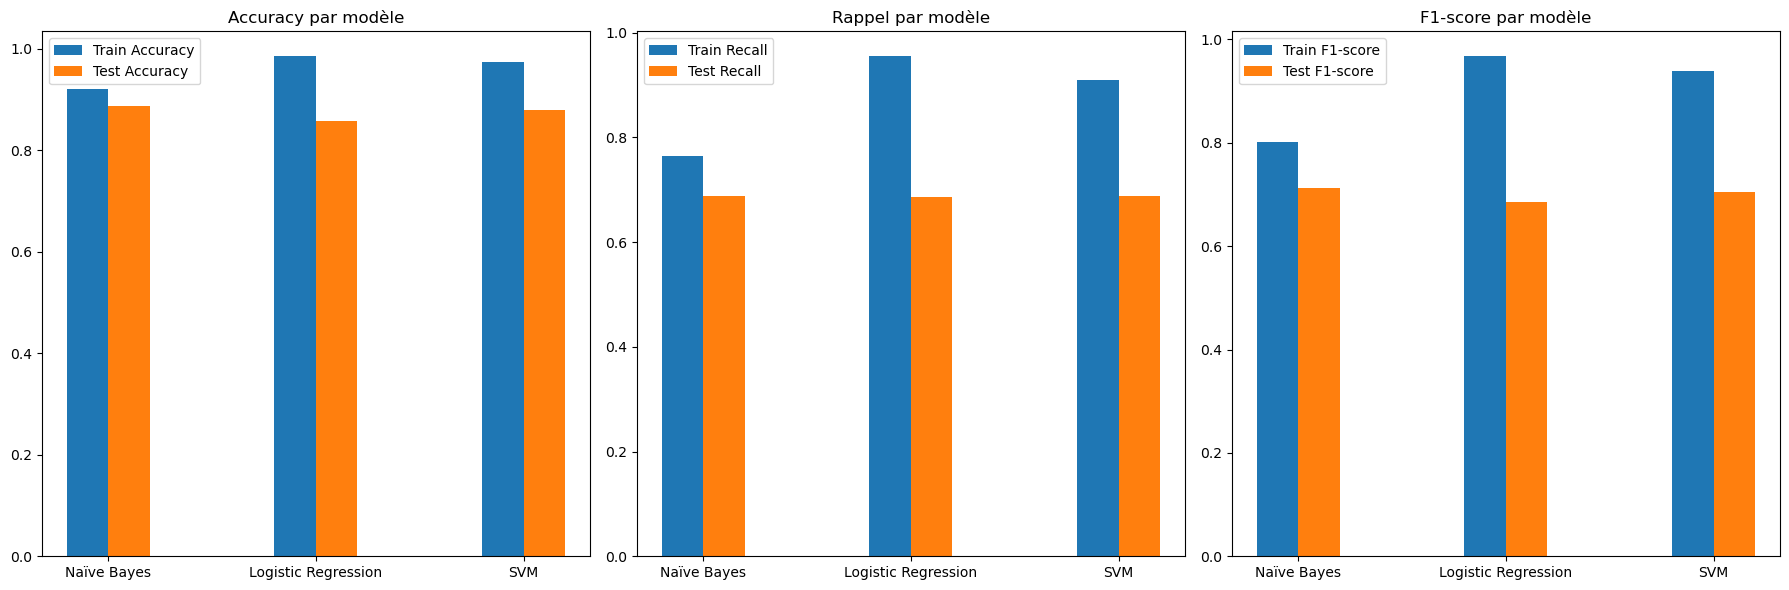


------------------ Bag of Word n° 2 ------------------------


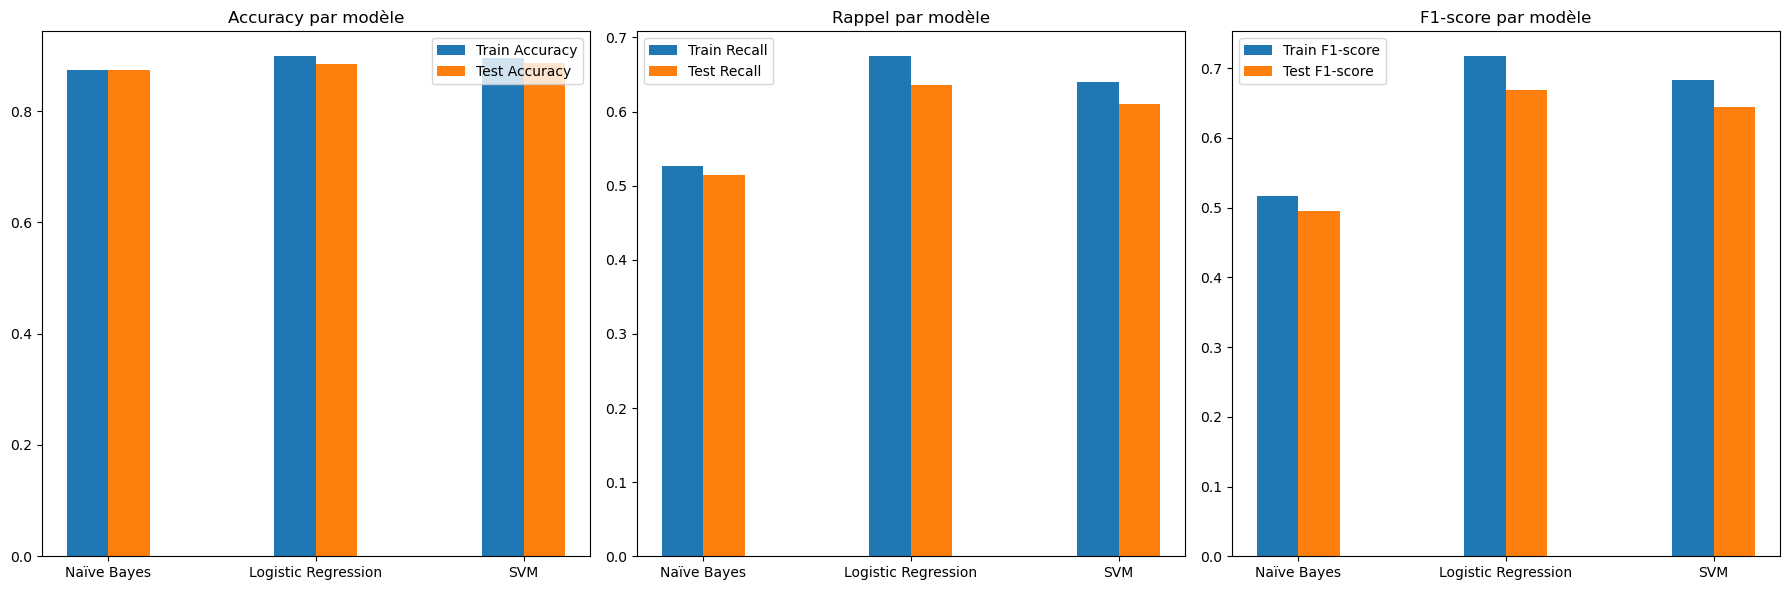


------------------ Bag of Word n° 3 ------------------------


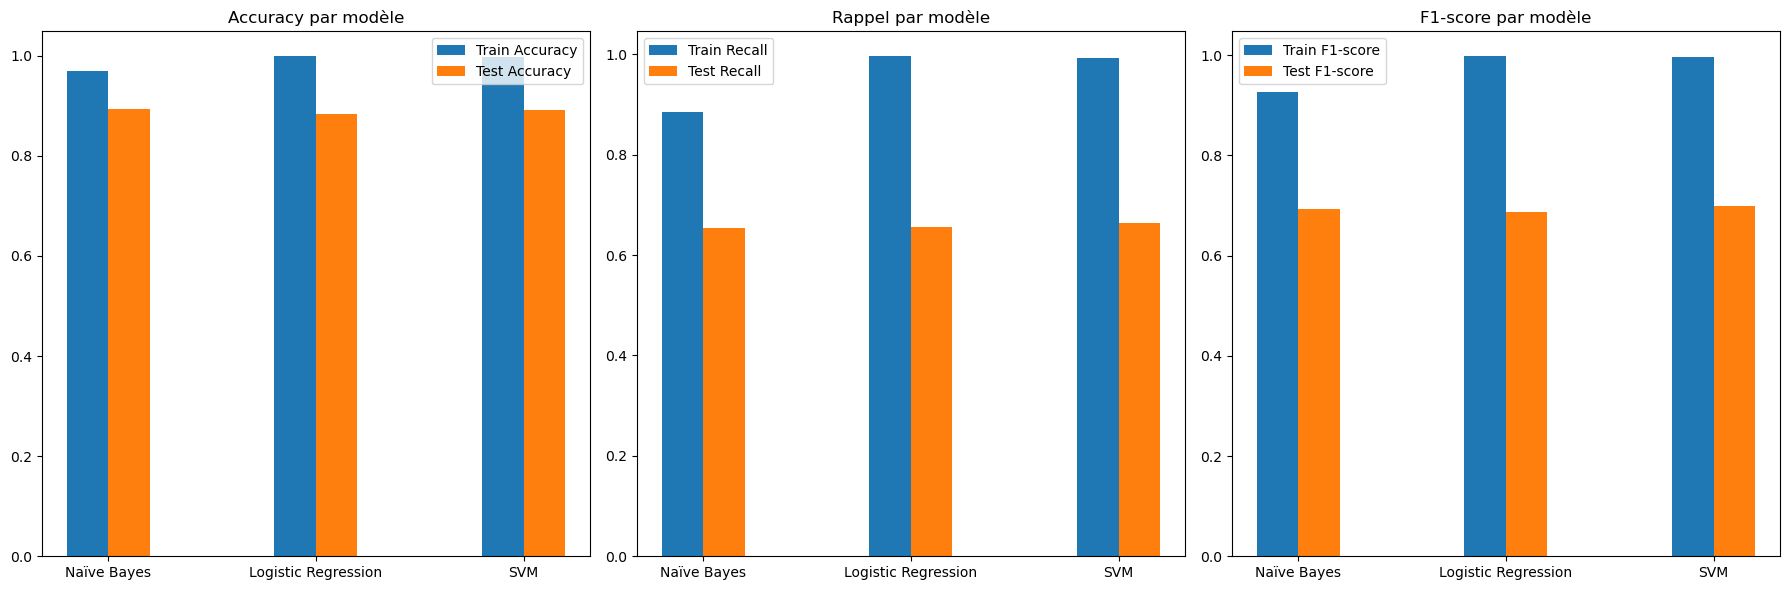


------------------ Bag of Word n° 4 ------------------------


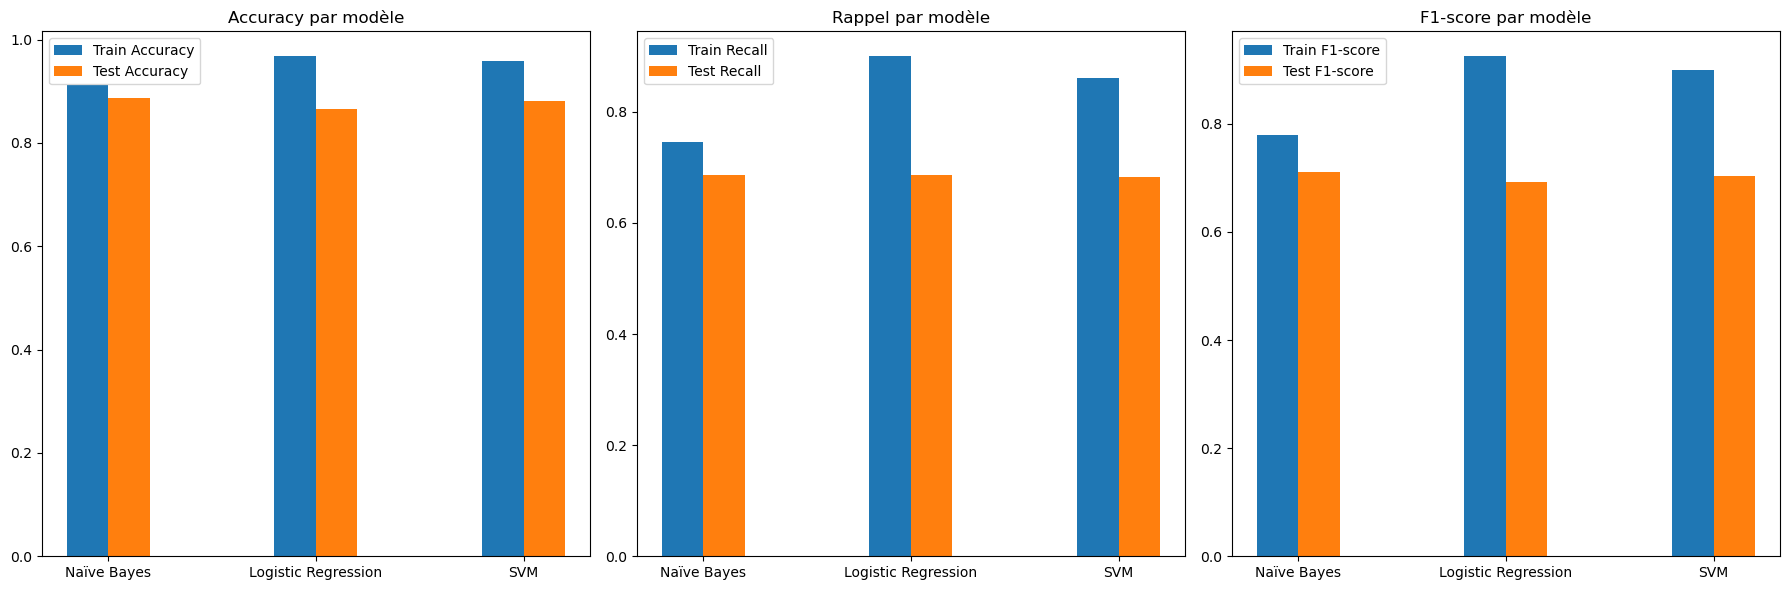


------------------ Bag of Word n° 5 ------------------------


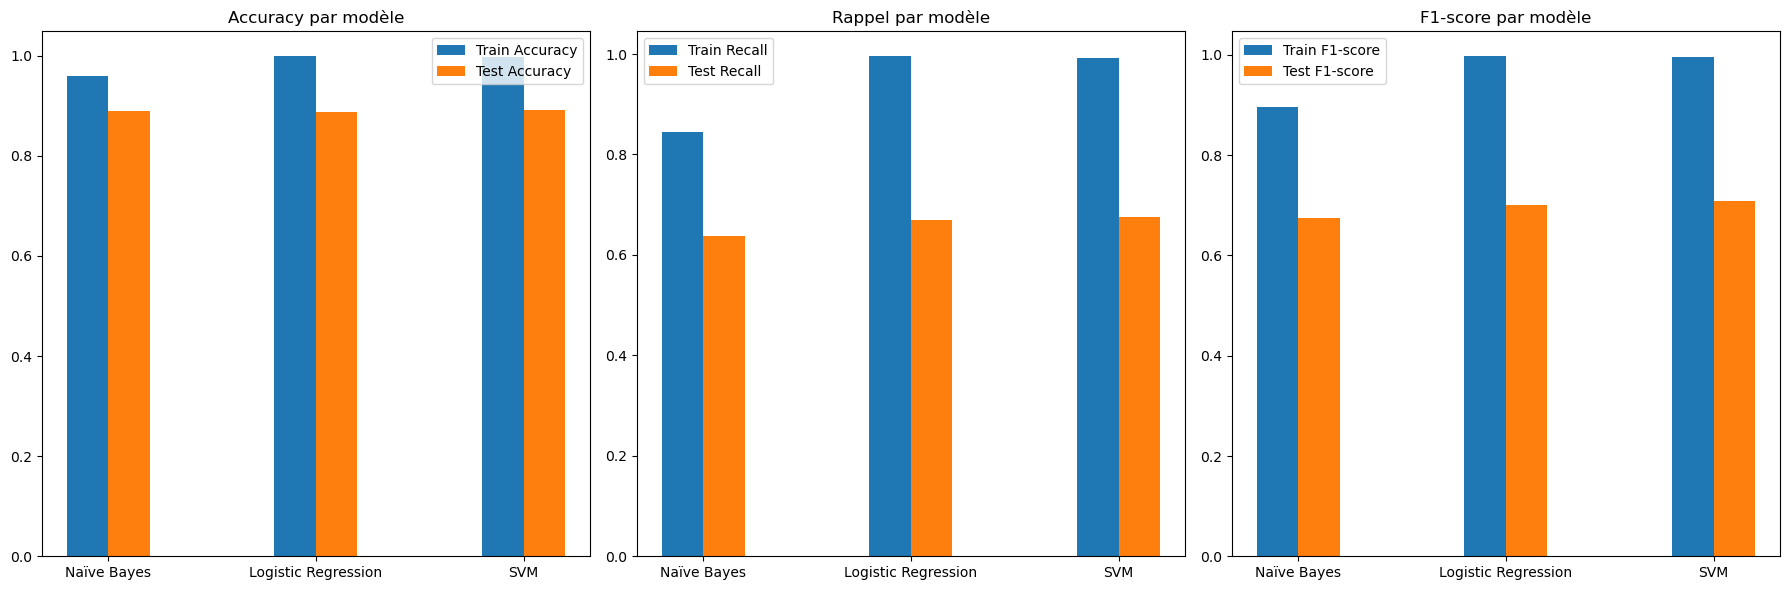


------------------ Bag of Word n° 6 ------------------------


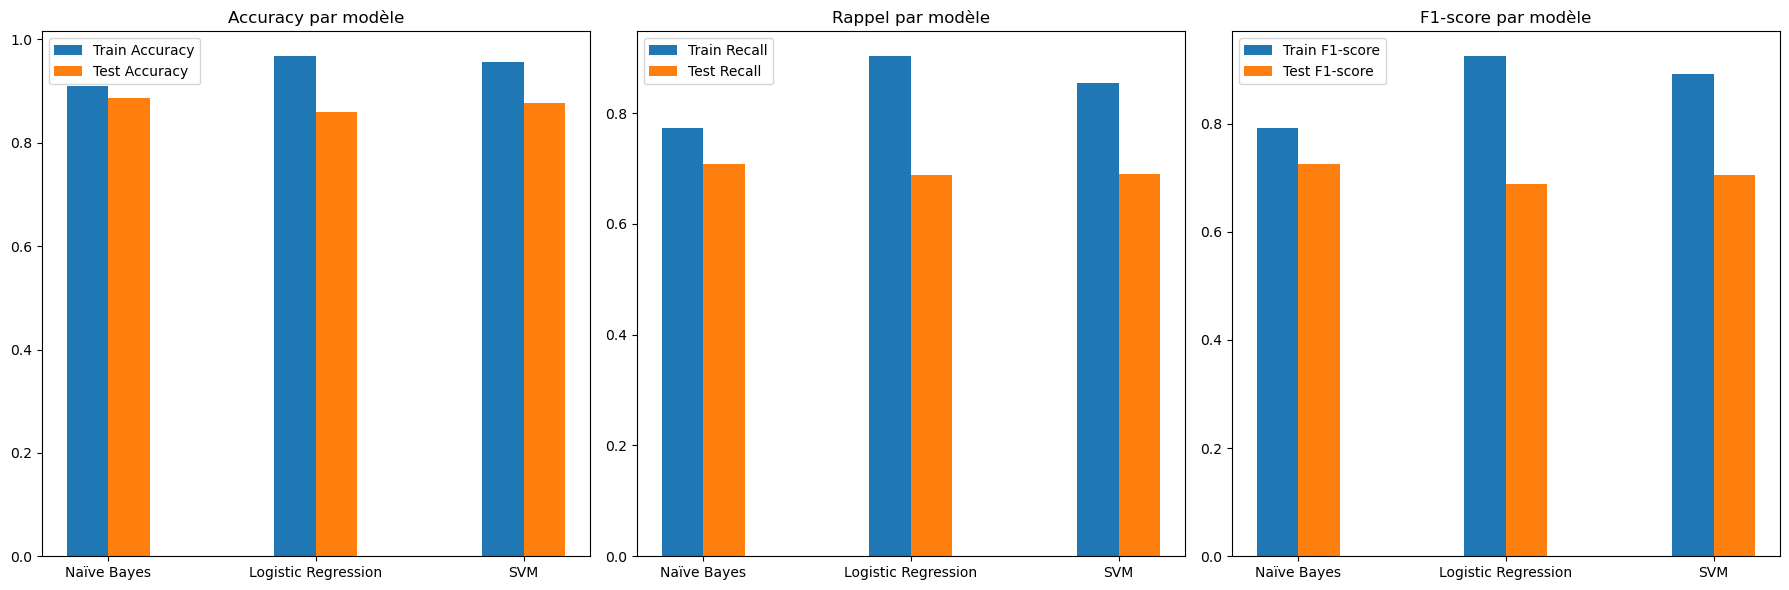


------------------ Bag of Word n° 7 ------------------------


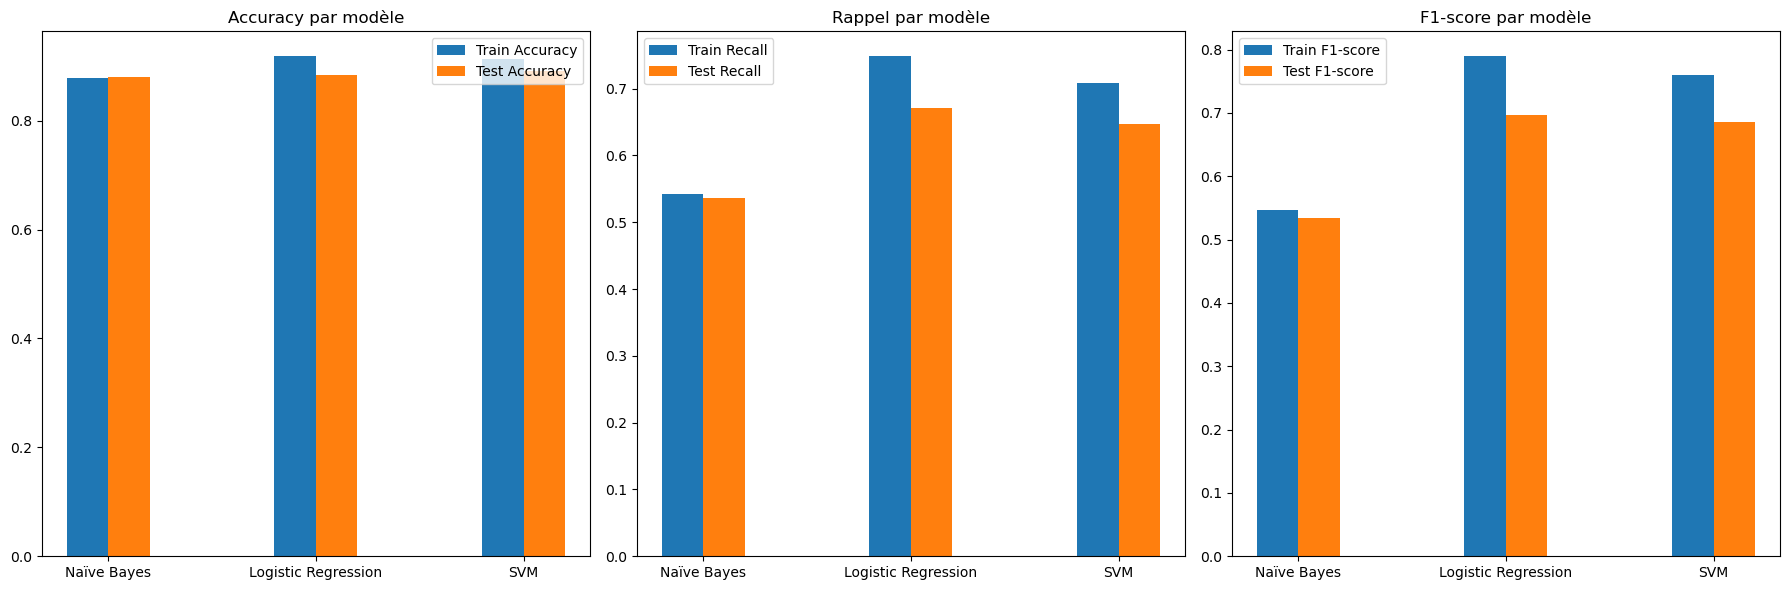


------------------ Bag of Word n° 8 ------------------------


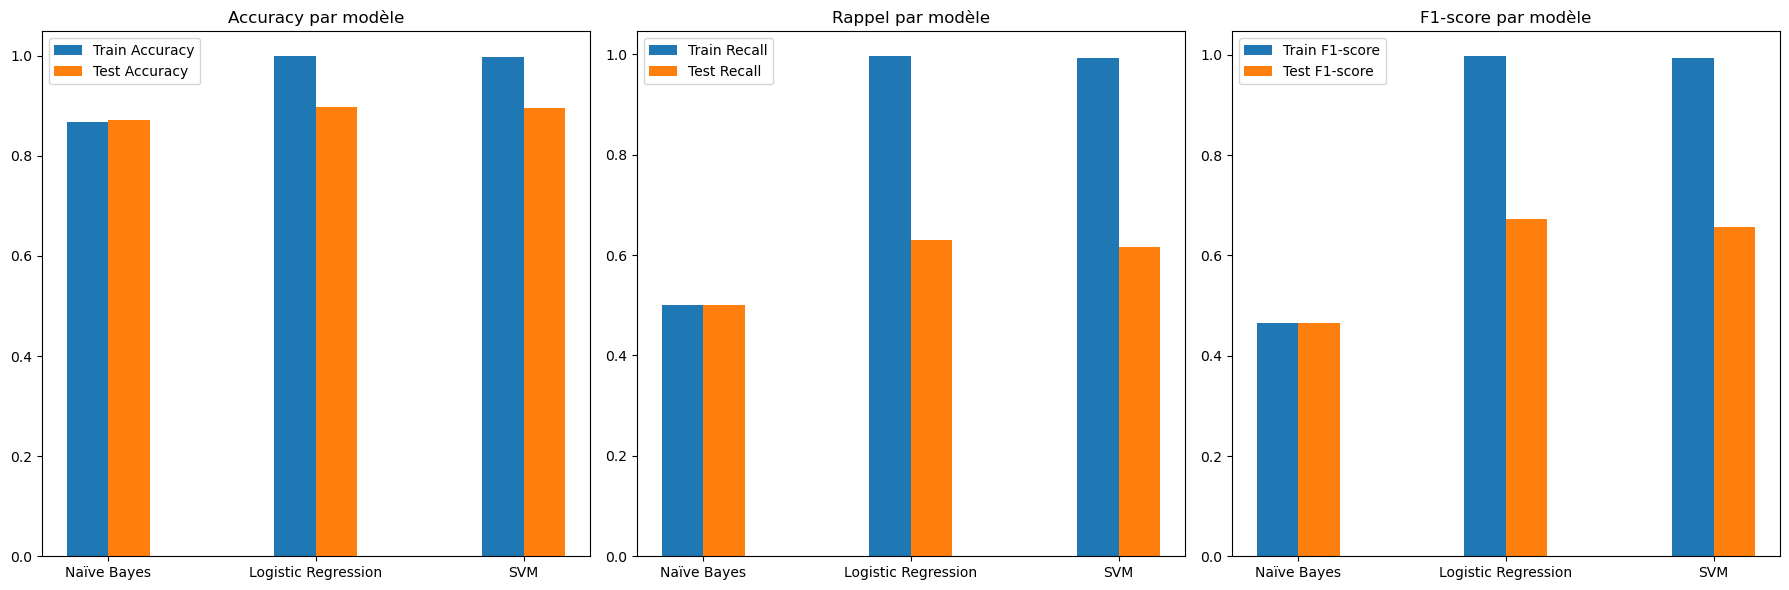

In [53]:
bows = [BOW1,BOW2,BOW3,BOW4,BOW5,BOW6,BOW7,BOW8]
for i in range(len(bows)):
    print("\n------------------ Bag of Word n°",i+1,"------------------------")
    classifier2(bows[i],alllabs)